<a href="https://colab.research.google.com/github/GenAIUnplugged/pytorch/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import torch
import torchvision
from torchvision.models import vgg16,VGG16_Weights
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
vgg_model = vgg16(VGG16_Weights.DEFAULT)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 70.2MB/s]


In [5]:
vgg_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [24]:
weights = VGG16_Weights.DEFAULT

In [25]:
transforms = weights.transforms()

In [55]:
image = Image.open("/content/model.jpg")

In [56]:
img = transforms(image)

In [57]:
img.shape

torch.Size([3, 224, 224])

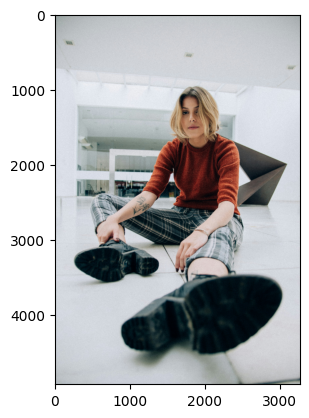

In [58]:
plt.imshow(image)

In [59]:
img = img.unsqueeze(dim=0)
img.shape

torch.Size([1, 3, 224, 224])

In [60]:
vgg_model.eval()
with torch.no_grad():
  result = vgg_model(img)

In [61]:
result.shape

torch.Size([1, 1000])

In [62]:
result.squeeze(0).shape

torch.Size([1000])

In [63]:
pred_cls = torch.softmax(result,dim=1).argmax(dim=1).item()
pred_cls

630

In [64]:
weights.meta.keys()

dict_keys(['min_size', 'categories', 'recipe', '_docs', 'num_params', '_metrics', '_ops', '_file_size'])

In [65]:
cls_name = weights.meta["categories"][pred_cls]
cls_name

'Loafer'